<a href="https://colab.research.google.com/github/sergioberdiales/TFM_KSchool_Gijon_Air_Pollution/blob/master/5_Prediction_Models_0_AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
with open('/content/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/gdrive/My\ Drive/foo.txt

Hello Google Drive!

In [0]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


We upload the train and test data

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving X_train_2014_2016.csv to X_train_2014_2016.csv
Saving y_train_2014_2016.csv to y_train_2014_2016.csv
User uploaded file "X_train_2014_2016.csv" with length 2239889 bytes
User uploaded file "y_train_2014_2016.csv" with length 74664 bytes


In [0]:
!ls

gdrive	     X_test_201701_201709.csv  y_test_201701_201709.csv
sample_data  X_train_lite.csv	       y_train_lite.csv


In [0]:
#X_train = pd.read_csv("X_train_lite.csv")
#y_train = pd.read_csv("y_train_lite.csv")

X_train = pd.read_csv("X_train_2014_2016.csv")
y_train = pd.read_csv("y_train_2014_2016.csv")

#X_train = pd.read_csv("X_train_2009_2016.csv")
#y_train = pd.read_csv("y_train_2009_2016.csv")

X_test = pd.read_csv("X_test_201701_201709.csv")
y_test = pd.read_csv("y_test_201701_201709.csv")

#X_test = pd.read_csv("X_test.csv")
#y_test = pd.read_csv("y_test.csv")

In [0]:
X_train.head()

,pm10_1,pm10_2,pm10_3,pm10_4,pm10_5,pm10_6
0,57,51,62,54,49,51
1,51,57,51,62,54,49
2,34,51,57,51,62,54
3,29,34,51,57,51,62
4,22,29,34,51,57,51


In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68838 entries, 0 to 68837
Data columns (total 30 columns):
pm10_1      68838 non-null int64
pm10_2      68838 non-null int64
pm10_3      68838 non-null int64
pm10_4      68838 non-null int64
pm10_5      68838 non-null int64
pm10_6      68838 non-null int64
pm10_7      68838 non-null int64
pm10_8      68838 non-null int64
pm10_9      68838 non-null int64
pm10_10     68838 non-null int64
pm10_11     68838 non-null int64
pm10_12     68838 non-null int64
pm10_13     68838 non-null int64
pm10_14     68838 non-null int64
pm10_15     68838 non-null int64
pm10_16     68838 non-null int64
pm10_17     68838 non-null int64
pm10_18     68838 non-null int64
pm10_19     68838 non-null int64
pm10_20     68838 non-null int64
pm10_21     68838 non-null int64
pm10_22     68838 non-null int64
pm10_23     68838 non-null int64
pm10_24     68838 non-null int64
pm10_48     68838 non-null int64
pm10_72     68838 non-null int64
pm10_96     68838 non-null int64


In [0]:
y_train.head()

,pm10_0
0,51
1,34
2,29
3,22
4,23


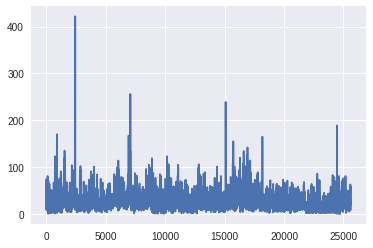

In [0]:
plt.plot(y_train["pm10_0"]);

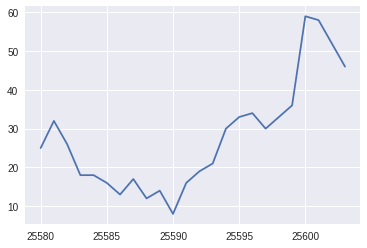

In [0]:
plt.plot(y_train["pm10_0"].iloc[-24:]);

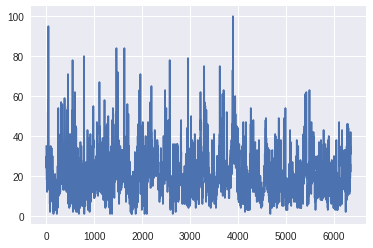

In [0]:
plt.plot(y_test["pm10_0"]);

Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [0]:
regLR = LinearRegression()

In [0]:
regLR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
y_pred = regLR.predict(X_test)

NameError: ignored

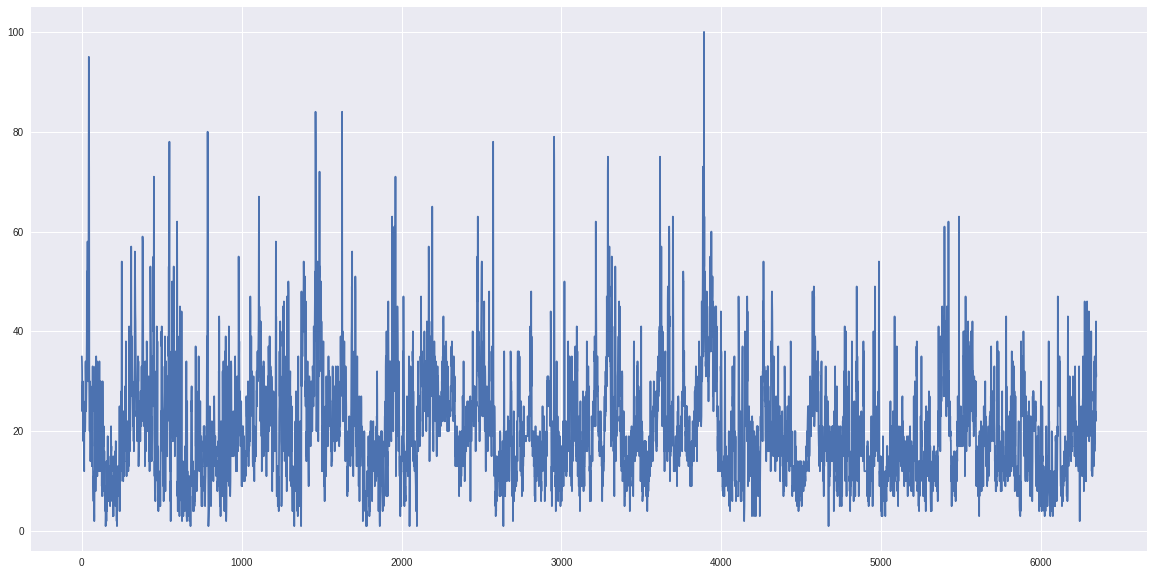

In [0]:
plt.figure(figsize=(20,10))
plot(y_test)
plot(y_pred)

In [0]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(regLR.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
#print('Variance score: %.2f' % r2_score(y_test, y_pred))

# print the coefficients
print(regLR.intercept_)
print(regLR.coef_)


R^2: 0.5931417871641943
Root Mean Squared Error: 6.874694613214001
[1.21393837]
[[ 0.55139603  0.18912663 -0.05140925  0.02115704  0.03068134 -0.00457572
  -0.00160686  0.01032189  0.01337895  0.00943608  0.01024491  0.00560632
   0.00571998  0.00475862 -0.00741468 -0.000702    0.00403739 -0.01185653
   0.00993576  0.01856046  0.00759718  0.02763389  0.0258764   0.0080155
   0.01923249  0.0055774   0.01073585  0.01034028  0.01754818  0.0138495 ]]


Lineal Regression results with train_lite (2016-10 - 2016-12) and only ar variables: 

R^2: 0.5968659071102793
Root Mean Squared Error: 8.221345003589494

Lineal Regression results with 3 years of training data (2014 - 2016) and only ar variables: 

R^2: 0.6080697440450848
Root Mean Squared Error: 8.106296882063704

Lineal Regression results with 8 years of training data (2009 - 2016) and only ar variables: 

R^2: 0.6018961355987215
Root Mean Squared Error: 8.169891825314368

The results get worse with more data. The r squared decreases and the RMSE increases. 

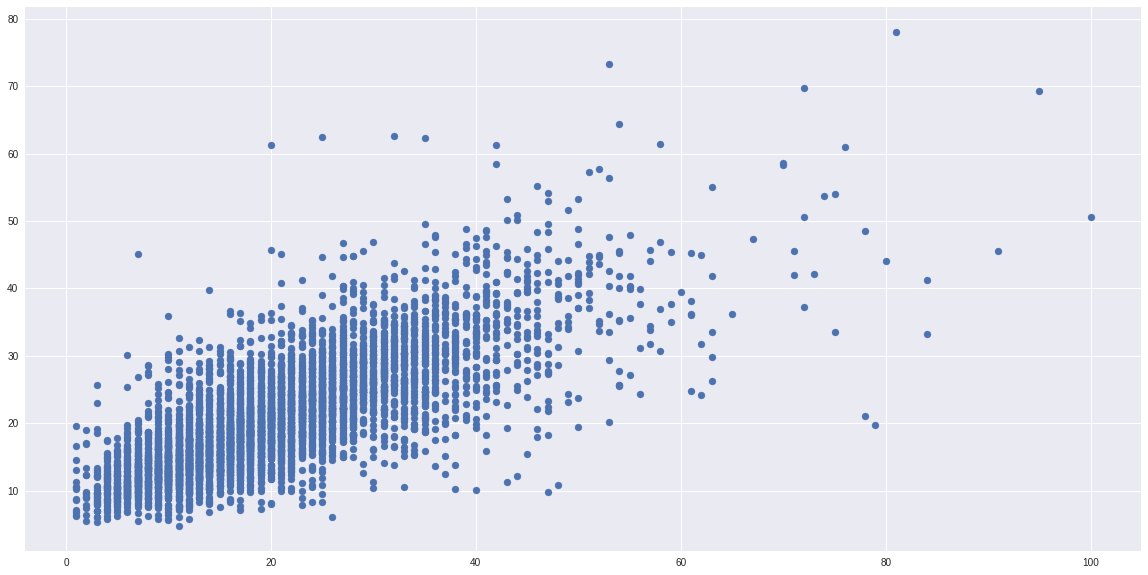

In [0]:

y_pred = y_pred.astype(float)
y_test = pd.DataFrame(y_test)
y_test = y_test.values
y_pred = pd.DataFrame(y_pred)
plt.figure(figsize=(20,10))
plt.scatter(x = y_test, y = y_pred)


In [0]:
y_test.to_csv('y_test_1', encoding='utf-8', index=False)
y_pred.to_csv('y_pred_1', encoding='utf-8', index=False)


Hemos comprobado que para predecir los valores del primer mes de 2017 el dataset del ultimo trimestre de 2016 nos funciona bastante bien, aumentandolo a tres años mejora sólo un poquito la capacidad explicativa del modelo y aumentándolo más incluso empeoraría. De todas formas quizás estemos utilizando un dataset de test demasiado pequeño y cercano en el tiempo al dataset de train, con lo que podríamos estar obteniendo un modelo que sólo funcionase bien con el mes de enero por ejemplo. Para intentar evitar esto voy a utilizar un grupo de test mayor: los tres primeros trimestres de 2017, dejando el último trimestre sin tocar hasta el final para validación.



Lineal Regression results with train_lite (2016-10 - 2016-12) and only ar variables: 

R^2: 0.5840571289201126
Root Mean Squared Error: 6.951022748792432

Lineal Regression results with 3 years of training data (2014 - 2016) and only ar variables: 

R^2: 0.5964281362879187
Root Mean Squared Error: 6.846873552397199


Lineal Regression results with 8 years of training data (2009 - 2016) and only ar variables: 

R^2: 0.5931417871641943
Root Mean Squared Error: 6.874694613214001

Ampliando el grupo de test vemos como el R cuadrado se reduce ligeramente pero el RMSE se reduce bastante más. 



Random Forest Regressor

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
regRFR = GridSearchCV(RandomForestRegressor(n_estimators=1000,min_samples_leaf=1,max_depth=4),
                   param_grid={"min_samples_leaf":[10,20,30,40,70,100],
                              "max_depth":range(2,10)},
                   scoring="neg_mean_squared_error")
regRFR.fit(X_train,y_train)
print(regRFR.best_params_)
print(regRFR.best_score_)
print(np.sqrt(-regRFR.best_score_))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 

{'max_depth': 5, 'min_samples_leaf': 10}
-70.84835957521966
8.417146759752955


In [0]:
{'max_depth': 5, 'min_samples_leaf': 10}
-70.93701309322749
8.422411358585348

          Resultados random forest train_lite

GridSearchCV(RandomForestRegressor(n_estimators=100,min_samples_leaf=1,max_depth=4),
                   param_grid={"min_samples_leaf":[10,20,30,40,70,100],
                              "max_depth":range(2,10)},
                   scoring="neg_mean_squared_error")

{'max_depth': 5, 'min_samples_leaf': 10}
-70.93701309322749
8.422411358585348

r2_score(y_test, y_pred) = 0.5807987069937522

con n_estimators = 1000

-70.93701309322749
8.422411358585348

r2_score(y_test, y_pred) = 0.5808991816442846

         Resultados con train 2014 - 2016 (n_estimators = 100)

{'max_depth': 8, 'min_samples_leaf': 10}
-70.86624571321295
8.418209174950034

 r2_score(y_test, y_pred) = 0.5754271936189217

        Resultados con train 2014 - 2016 (n_estimators = 1000)

{'max_depth': 5, 'min_samples_leaf': 10}
-70.84835957521966
8.417146759752955



In [0]:
from sklearn.metrics import r2_score

In [0]:
y_pred = regRFR.predict(X_test)

In [0]:
r2_score(y_test, y_pred)

0.5805484228651592

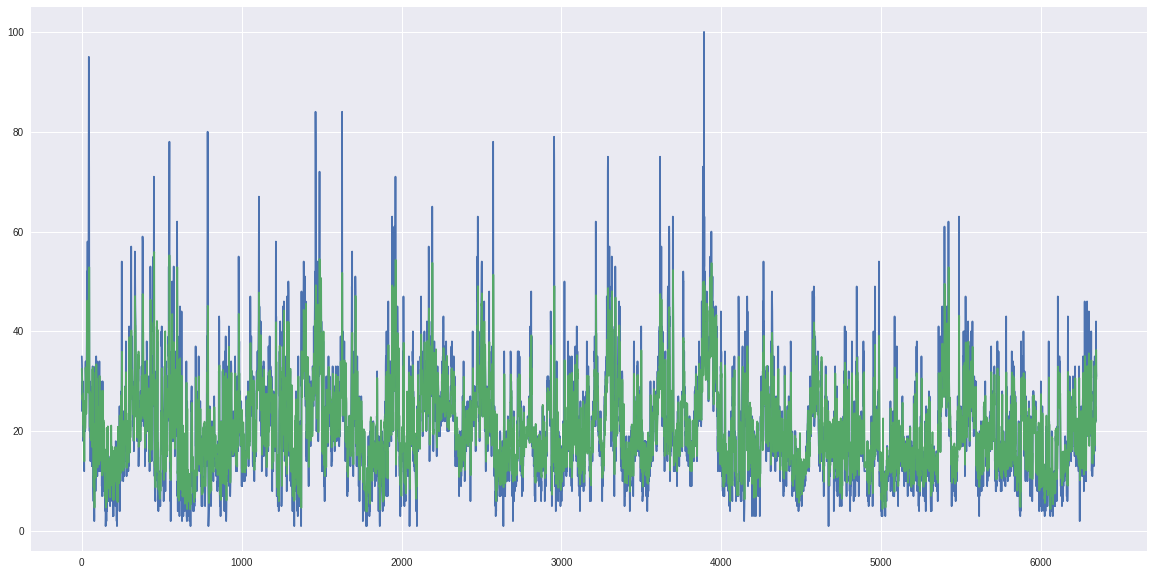

In [0]:
plt.figure(figsize=(20,10))
plot(y_test)
plot(y_pred)

In [0]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(regRFR.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
#print('Variance score: %.2f' % r2_score(y_test, y_pred))


R^2: -48.69522176015445
Root Mean Squared Error: 6.978196168076278


AttributeError: ignored

SyntaxError: ignored

Reduction of variables

Probamos  con las 6 primeras variables.

In [0]:
X_train = X_train[X_train.columns[0:4]]
X_test = X_test[X_test.columns[0:4]]

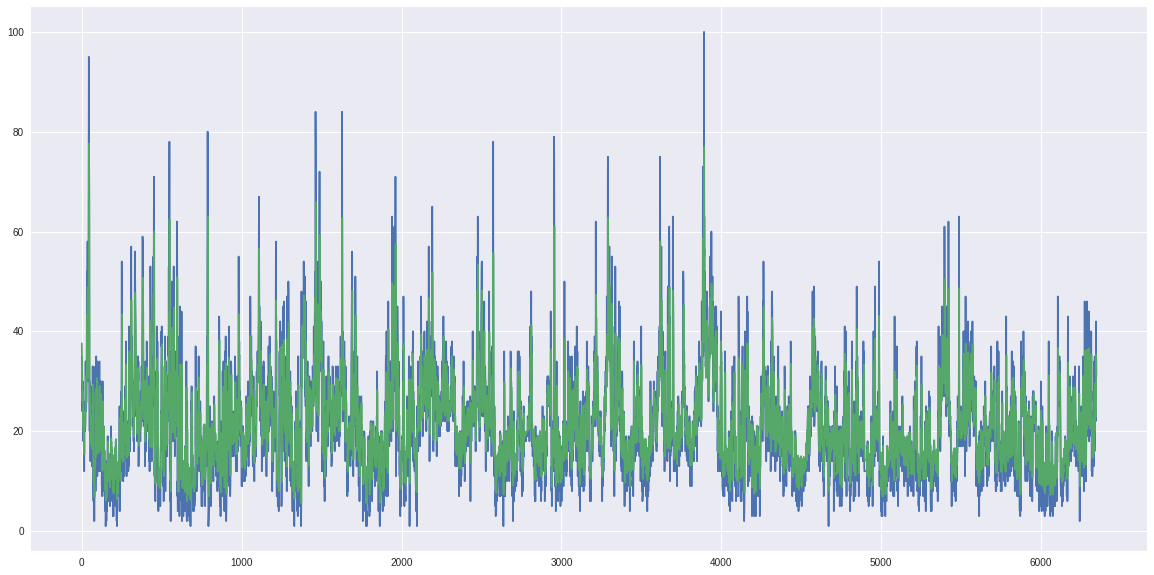

In [0]:
regLR = LinearRegression()
regLR.fit(X_train, y_train)
y_pred = regLR.predict(X_test)
plt.figure(figsize=(20,10))
plot(y_test)
plot(y_pred)

In [0]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(regLR.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
#print('Variance score: %.2f' % r2_score(y_test, y_pred))

# print the coefficients
print(regLR.intercept_)
print(regLR.coef_)

R^2: 0.5873687035630151
Root Mean Squared Error: 6.92329678891284
[4.19883254]
[[0.59870982 0.13730629 0.03928065 0.05459173]]


Resultados regresion lineal con train 2014-2016 y solo las 6 primeras variables lagged

Apenas hay diferencias con el modelo de 30 variables.

R^2: 0.5889628398895992
Root Mean Squared Error: 6.909910311364052
[3.93467102]
[[0.59569712 0.13497708 0.03328157 0.02881637 0.0207577  0.02705815]]

Con solo las 4 primeras. Apenas se mueve. 

R^2: 0.5873687035630151
Root Mean Squared Error: 6.92329678891284
[4.19883254]
[[0.59870982 0.13730629 0.03928065 0.05459173]]

Probamos a dejar solo las dos primeras. Es decir, los niveles de PM10 de las dos horas precedentes al valor que queremos predecir.

Las diferencias son muy pequeñas también. 

R^2: 0.5825291214207613
Root Mean Squared Error: 6.963778681133049
[4.78661913]
[[0.61635125 0.18972618]]

Si hacemos un modelo con una única variable, el valor de la hora precedente casi obtenemos un R cuadrado de 57%

R^2: 0.5693274409714437
Root Mean Squared Error: 7.073029471241542
[5.90722781]
[[0.76068138]]



En principio, viendo lo poco que aportan el resto de variables, voy a quedarme con sólo las 4 primeras. Tendré un modelo que en principio explica un menos de la variabilidad y con un error un poco mayor, pero mucho menos complejo, lo que me dará agilidad a la hora de procesar e ir probando la introducción de otras variables.

KNeighbors Regression

In [0]:
from sklearn.neighbors import KNeighborsRegressor
regKN = KNeighborsRegressor(n_neighbors=5)
from sklearn.model_selection import cross_val_score

In [0]:
regKN.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [0]:
y_pred = regKN.predict(X_test)

In [0]:
# MAE
cross_val_score(regKN,X_train,y_train,scoring="neg_mean_absolute_error").mean()

-6.938626222661831

In [0]:
# RMSE
np.sqrt(-cross_val_score(regKN,X_train,y_train,scoring="neg_mean_squared_error").mean())

9.998242656152394

In [0]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(regKN.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.41119432400473
Root Mean Squared Error: 9.935828886015193


In [0]:
!ls

gdrive	sample_data  X_test.csv  X_train_lite.csv  y_test.csv  y_train_lite.csv


In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
regGS = GridSearchCV(KNeighborsRegressor(n_neighbors=1),
                   param_grid={"n_neighbors":range(1,50)},
                   scoring="neg_mean_squared_error")

In [0]:
regGS.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 50)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [0]:
np.sqrt(-regGS.best_score_)

9.61452092990897

In [0]:
regGS.best_params_

{'n_neighbors': 18}

In [0]:
y_pred = regGS.predict(X_test)

In [0]:
y_pred = pd.DataFrame(y_pred)

In [0]:
y_pred.head()

,0
0,39.722222
1,32.777778
2,30.611111
3,27.055556
4,24.000000


In [0]:

y_pred = y_pred.rename(columns={"0": "pm10_0"})


In [0]:
y_pred.columns = ['pm10_0']
y_pred = y_pred.astype(float)

In [0]:
y_pred.info()
y_pred.shape

<class 'pandas.core.frame.DataFrame'>
Index: 575 entries, 0 to 574
Data columns (total 1 columns):
pm10_0    575 non-null float64
dtypes: float64(1)
memory usage: 9.0+ KB


(575, 1)

In [0]:
y_test = y_test.astype(float)
y_test.info()
y_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 1 columns):
pm10_0    575 non-null float64
dtypes: float64(1)
memory usage: 4.6 KB


(575, 1)

In [0]:
print("R^2: {}".format(regGS.score(y_test, y_pred)))

ValueError: ignored

In [0]:
regGS.score(X_test, y_test)

-95.49161567364465

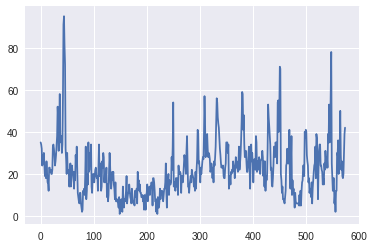

In [0]:
plot(y_test)

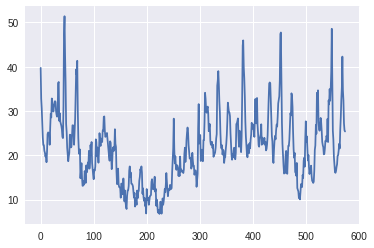

In [0]:
plot(y_pred)

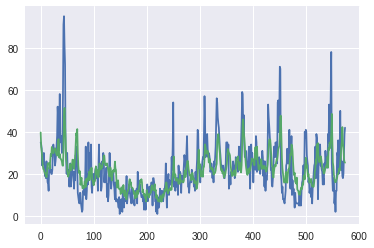

In [0]:
plot(y_test)
plot(y_pred)

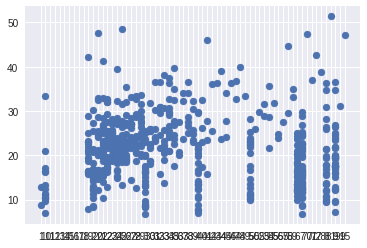

In [0]:
plt.scatter(y_test, y_pred)

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

Random Forest Regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor
regRFR = GridSearchCV(RandomForestRegressor(n_estimators=100,min_samples_leaf=1,max_depth=4),
                   param_grid={"min_samples_leaf":[10,20,30,40,70,100],
                              "max_depth":range(2,10)},
                   scoring="neg_mean_squared_error")
regRFR.fit(X_train,y_train)
print(regRFR.best_params_)
print(regRFR.best_score_)
print(np.sqrt(-regRFR.best_score_))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 

{'max_depth': 5, 'min_samples_leaf': 10}
-71.22191115678358
8.439307504575455


In [0]:
y_pred = regRFR.predict(X_test)

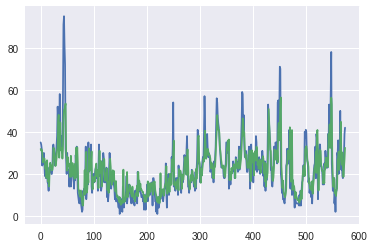

In [0]:
plot(y_test)
plot(y_pred)

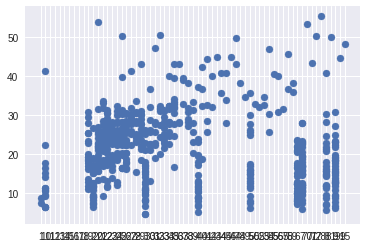

In [0]:
plt.scatter(y_test, y_pred)

In [0]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(regRFR.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: -68.48079844564434
Root Mean Squared Error: 8.27531258899894


In [0]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

68.43043306104964
Root Mean Squared Error: 8.272268918564581


Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
regLR = GridSearchCV(LinearRegression(),
                   param_grid={},
                   scoring="neg_mean_squared_error")
regLR.fit(X_train,y_train)

print(regLR.best_params_)
print(regLR.best_score_)
print(np.sqrt(-regLR.best_score_))

{}
-80.78990942218464
8.988320723148714


XGBoost

In [0]:
from xgboost import XGBRegressor
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
regXGB = GridSearchCV(XGBRegressor(n_estimators=100, min_samples_leaf=1,max_depth=4),
                   param_grid={"min_samples_leaf":[10,20,30,40,70,100],
                              "max_depth":range(2,10)},
                   scoring="neg_mean_squared_error")
regXGB.fit(X_train,y_train)

print(regXGB.best_params_)
print(regXGB.best_score_)
print(np.sqrt(-regXGB.best_score_))
print(mean_absolute_error(y_test, y_pred))







{'max_depth': 2, 'min_samples_leaf': 10}
-71.49523980790217
8.455485781899355


NameError: ignored

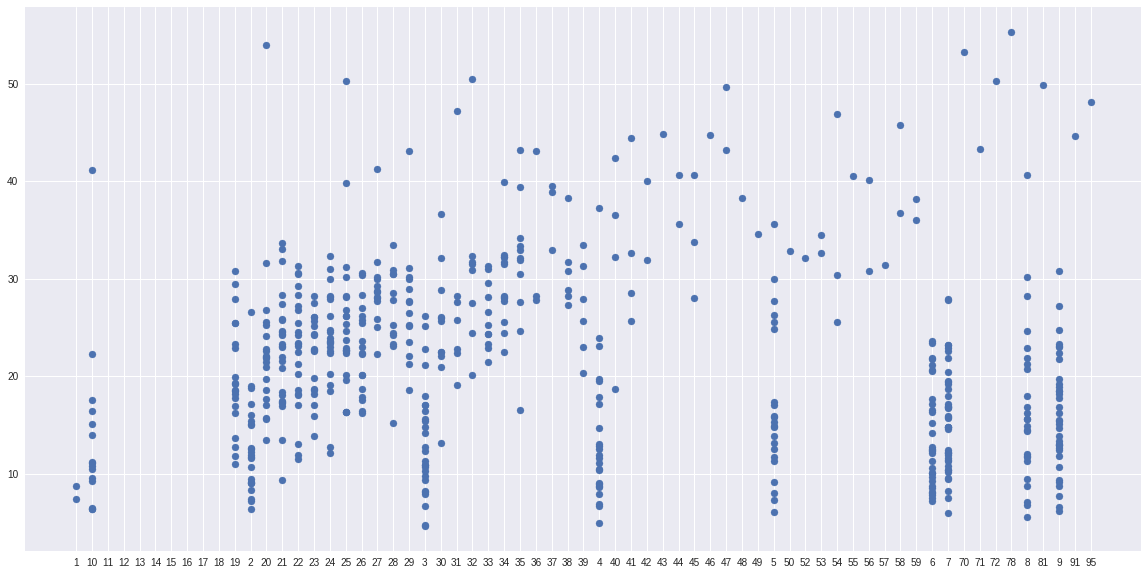

In [0]:
plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred)

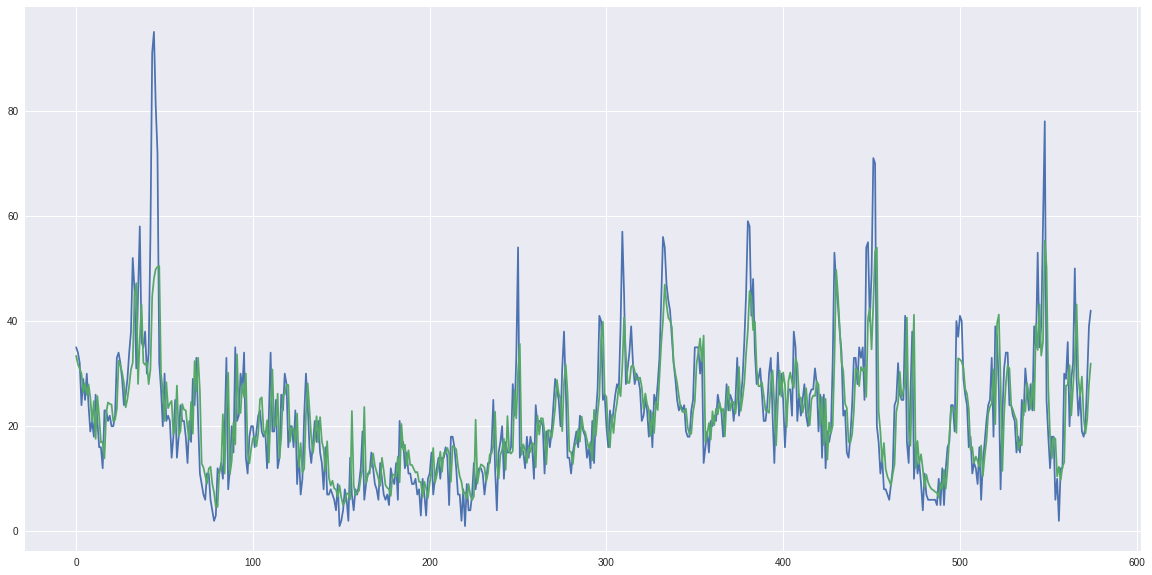

In [0]:
plt.figure(figsize=(20,10))
plot(y_test)
plot(y_pred)

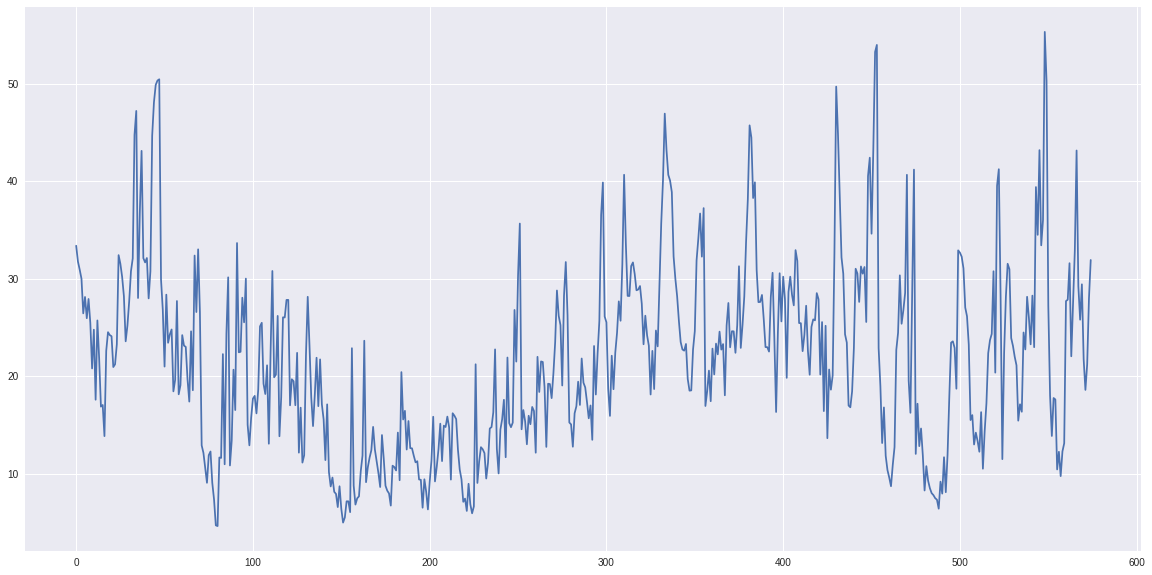